In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/l7/qksjftz12pz0s32y0l3jd4k4cyyb65/T/ipykernel_33523/3347640643.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1675782615.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/abc.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/io.py": 1675782614.0, "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/stat.py": 1675782614.0, "/Libr

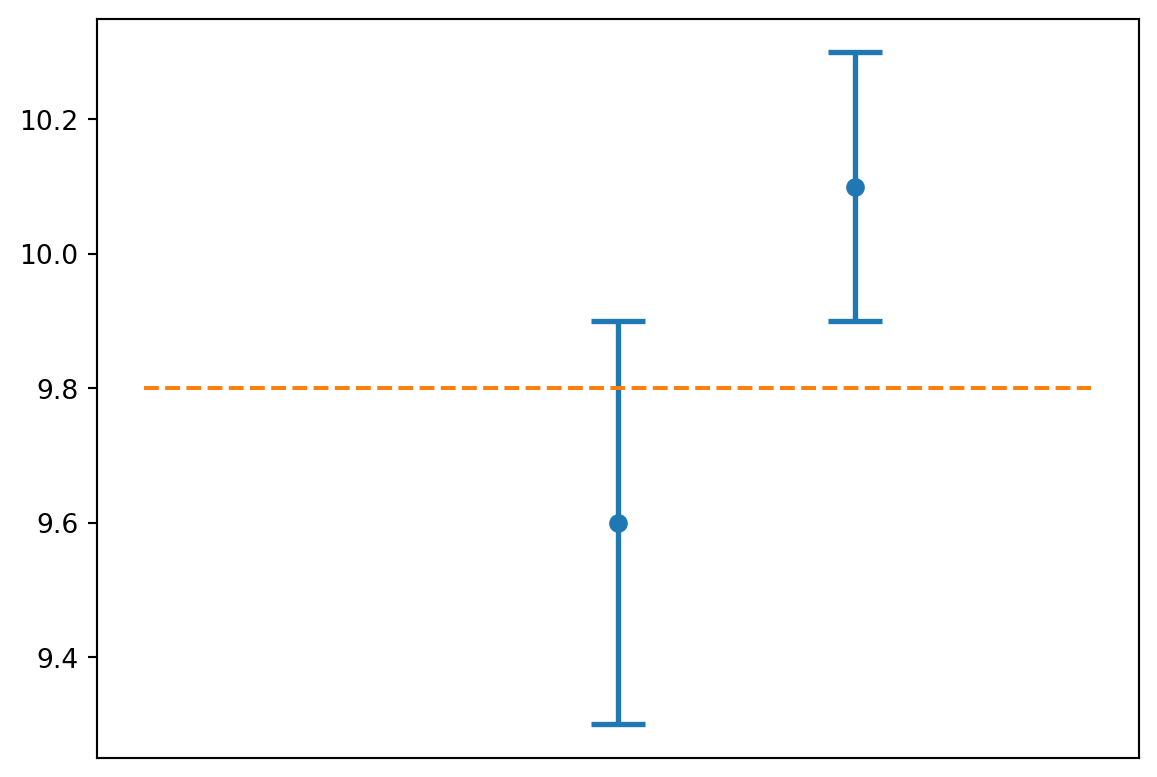

In [2]:
from matplotlib.pyplot import errorbar,show,xticks,plot

x = [2,3]
y = [9.6,10.1]
dy = [0.3,0.2]
errorbar(x,y,yerr = dy,capsize = 10,marker = "o",linewidth = 2,capthick = 2,ls = 'none',xticks = None)
plot([0,4],[9.8,9.8],ls = 'dashed')
xticks([],[])
show()

In [3]:
#| eval: true
#| echo: true
#| output: true
from numpy import sqrt
b = 5.1
db = 0.2
a = 1.8
da = 0.1
x = 3.92
dx = 0.05
f = b + a * x**2
df = sqrt(db**2+ (2 * x * a * dx)**2)
print(f"f = {f:5.1f} +- {df:0.1f}")

f =  32.8 +- 0.7


In [4]:
#| eval: false 
from pylab import *
%matplotlib inline

# Enter values for cylinder diameter, height, and mass. Give estimates of the uncertainties.
d =              # diameter of cylinder in cm
un_d =           # uncertainty of cylinder diameter in cm
h =              # height of cylinder in cm
un_h =           # uncertainty of cylinder height in cm
m =              # mass of cylinder in gm
un_m =           # uncertainty of cylinder mass in gm

# Calculate and print the density and its uncertainty
V =              # Use equations above to calculate volume of cylinder 
un_V =           # Use equation above to calculate uncertainty in volume

rho =            # Use equation above to calculate density of cylinder
un_rho =         # Use equation above to calculate uncertainty in density

print("The density of the cylinder is: {0:4.2f} +/- {1:4.2f} g/cm^3".format(rho,un_rho))

In [5]:
#| eval: false 

# Block dimensions
l =           # length of the block in cm
un_l =        # uncertainty of the length of the block in cm
w =           # width of the block in cm
un_w =        # uncertainty of the width of the block in cm
h_b =         # height of the block in cm
un_h_b =      # uncertainty of the height of the block in cm

# Compute volume of block with uncertainty
V_b =         # Calculate volume of block
un_V_b =      # Calculate uncertainty in volume (can you figure it out from looking at the equation for the cylinder?)

# Compute predicted mass of block
m_b =         # Use previously-calculate density to calculate mass of the block
un_m_b =      #Calculate the uncertainty in the mass

print("The predicted mass of the block is: {0:3.0f} +/- {1:1.0f} g".format(m_b,un_m_b))

In [6]:
#| eval: false 
# Room dimensions
lr =           # length of the room in m
un_lr =        # uncertainty of the length of the room in m
wr =           # width of the room in m
un_wr =        # uncertainty of the width of the room in m
hr =           # height of the room in m
un_hr =        # uncertainty of the height of the room in m

# Compute volume of the room with uncertainty
V_r =          # Compute the volume of the room
un_V_r =       # Compute the uncertainty in the volume.

print("The volume of the room is: {0:4.1f} +/- {1:3.1f} m^3".format(V_r,un_V_r))

In [7]:
#| eval: false 
import matplotlib.pyplot as plt
%matplotlib inline

group_num = [1,2,3,4,5,6]
volume = []  # Line 5
un_volume = []  # Line 6
ax = plt.axes()
ax.errorbar(group_num,volume,yerr = un_volume,fmt = 'go', capsize = 6)
plt.show()